In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [7]:
df1=df.drop(columns=['BloodPressure','SkinThickness'])

In [8]:
df1.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0,33.6,0.627,50,1
1,1,85,0,26.6,0.351,31,0
2,8,183,0,23.3,0.672,32,1
3,1,89,94,28.1,0.167,21,0
4,0,137,168,43.1,2.288,33,1


In [9]:
df.duplicated().sum()

0

In [10]:
X=df1.drop(columns=['Outcome'])
y=df1['Outcome']

In [11]:
X.head()


,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,0,33.6,0.627,50
1,1,85,0,26.6,0.351,31
2,8,183,0,23.3,0.672,32
3,1,89,94,28.1,0.167,21
4,0,137,168,43.1,2.288,33


In [12]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
X_train.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
120,0,162,100,53.2,0.759,25
172,2,87,0,28.9,0.773,25
307,0,137,148,24.8,0.143,21
7,10,115,0,35.3,0.134,29
448,0,104,64,33.6,0.510,22


In [14]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_train_scaled=scalar.fit_transform(X_train)
X_test_scaled=scalar.fit_transform(X_test)

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [16]:
model=Sequential()

In [17]:
model.add(Dense(32,activation='relu',input_dim=6))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

C:\Users\91637\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 257 (1.00 KB)

 Trainable params: 257 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=10,         # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity
)

In [20]:
history=model.fit(X_train_scaled,y_train,epochs=500,validation_data=(X_test_scaled,y_test),batch_size=32,callbacks=[early_stopping])

Epoch 1/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5469 - loss: 0.6955 - val_accuracy: 0.5974 - val_loss: 0.6656
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6671 - loss: 0.6324 - val_accuracy: 0.6883 - val_loss: 0.6291
Epoch 3/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6963 - loss: 0.5996 - val_accuracy: 0.6948 - val_loss: 0.6027
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7202 - loss: 0.5636 - val_accuracy: 0.6948 - val_loss: 0.5830
Epoch 5/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7418 - loss: 0.5282 - val_accuracy: 0.6948 - val_loss: 0.5693
Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7513 - loss: 0.5168 - val_accuracy: 0.6818 - val_loss: 0.5583
Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7358 - loss: 0.5115 - val_accuracy: 0.6818 - val_loss: 0.5505
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7517 - loss: 0.4960 - val_accuracy: 0.6948 - 

In [21]:
pip install -U keras-tuner

In [22]:
import keras_tuner as kt

In [23]:
def build_model(hp):

    model=Sequential()
   
    model.add(Dense(32,activation='relu',input_dim=6))
    model.add(Dense(1,activation='sigmoid'))

    optm=hp.Choice('optimizer', values=['adam','sgd','rmsprop','adadelta'])

    model.compile(optimizer=optm,loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [24]:
tuner=kt.RandomSearch(build_model,
                     objective='val_accuracy',
                     max_trials=5)

Reloading Tuner from .\untitled_project\tuner0.json


In [25]:
 tuner.search(X_train_scaled,y_train,epochs=5,validation_data=(X_test_scaled,y_test))

In [26]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [27]:
model=tuner.get_best_models(num_models=1)[0]

C:\Users\91637\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [28]:
model.fit(X_train_scaled,y_train,epochs=500,initial_epoch=6,validation_data=(X_test_scaled,y_test),batch_size=32,callbacks=[early_stopping])

Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7693 - loss: 0.5676 - val_accuracy: 0.7468 - val_loss: 0.5612
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7967 - loss: 0.5151 - val_accuracy: 0.7532 - val_loss: 0.5455
Epoch 9/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7693 - loss: 0.5103 - val_accuracy: 0.7532 - val_loss: 0.5326
Epoch 10/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7578 - loss: 0.4944 - val_accuracy: 0.7597 - val_loss: 0.5261
Epoch 11/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7333 - loss: 0.5210 - val_accuracy: 0.7662 - val_loss: 0.5199
Epoch 12/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7792 - loss: 0.4866 - val_accuracy: 0.7597 - val_loss: 0.5161
Epoch 13/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7726 - loss: 0.4751 - val_accuracy: 0.7597 - val_loss: 0.5142
Epoch 14/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7900 - loss: 0.4642 - val_accuracy: 0.75

In [29]:
def build_model(hp):

    model=Sequential()

    units =hp.Int('units',min_value=6,max_value=126,step=6)
   
    model.add(Dense(units=units,activation='relu',input_dim=6))
    model.add(Dense(1,activation='sigmoid'))

    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [30]:
tuner=kt.RandomSearch(build_model,
                     objective='val_accuracy',
                     max_trials=5,
                     directory='mydir')

Reloading Tuner from mydir\untitled_project\tuner0.json


In [31]:
tuner.search(X_train_scaled,y_train,epochs=5,validation_data=(X_test_scaled,y_test))

In [32]:
tuner.get_best_hyperparameters()[0].values

{'units': 66}

In [33]:
model=tuner.get_best_models(num_models=1)[0]

In [34]:
model.fit(X_train_scaled,y_train,epochs=500,initial_epoch=6,validation_data=(X_test_scaled,y_test),batch_size=32,callbacks=[early_stopping])

Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7759 - loss: 0.4603 - val_accuracy: 0.7857 - val_loss: 0.4969
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7779 - loss: 0.4636 - val_accuracy: 0.7857 - val_loss: 0.4932
Epoch 9/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7756 - loss: 0.4648 - val_accuracy: 0.7857 - val_loss: 0.4921
Epoch 10/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7623 - loss: 0.4846 - val_accuracy: 0.7857 - val_loss: 0.4916
Epoch 11/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7622 - loss: 0.4803 - val_accuracy: 0.7922 - val_loss: 0.4891
Epoch 12/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7864 - loss: 0.4274 - val_accuracy: 0.7922 - val_loss: 0.4882
Epoch 13/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8037 - loss: 0.4308 - val_accuracy: 0.7987 - val_loss: 0.4873
Epoch 14/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7650 - loss: 0.4637 - val_accuracy: 0.79

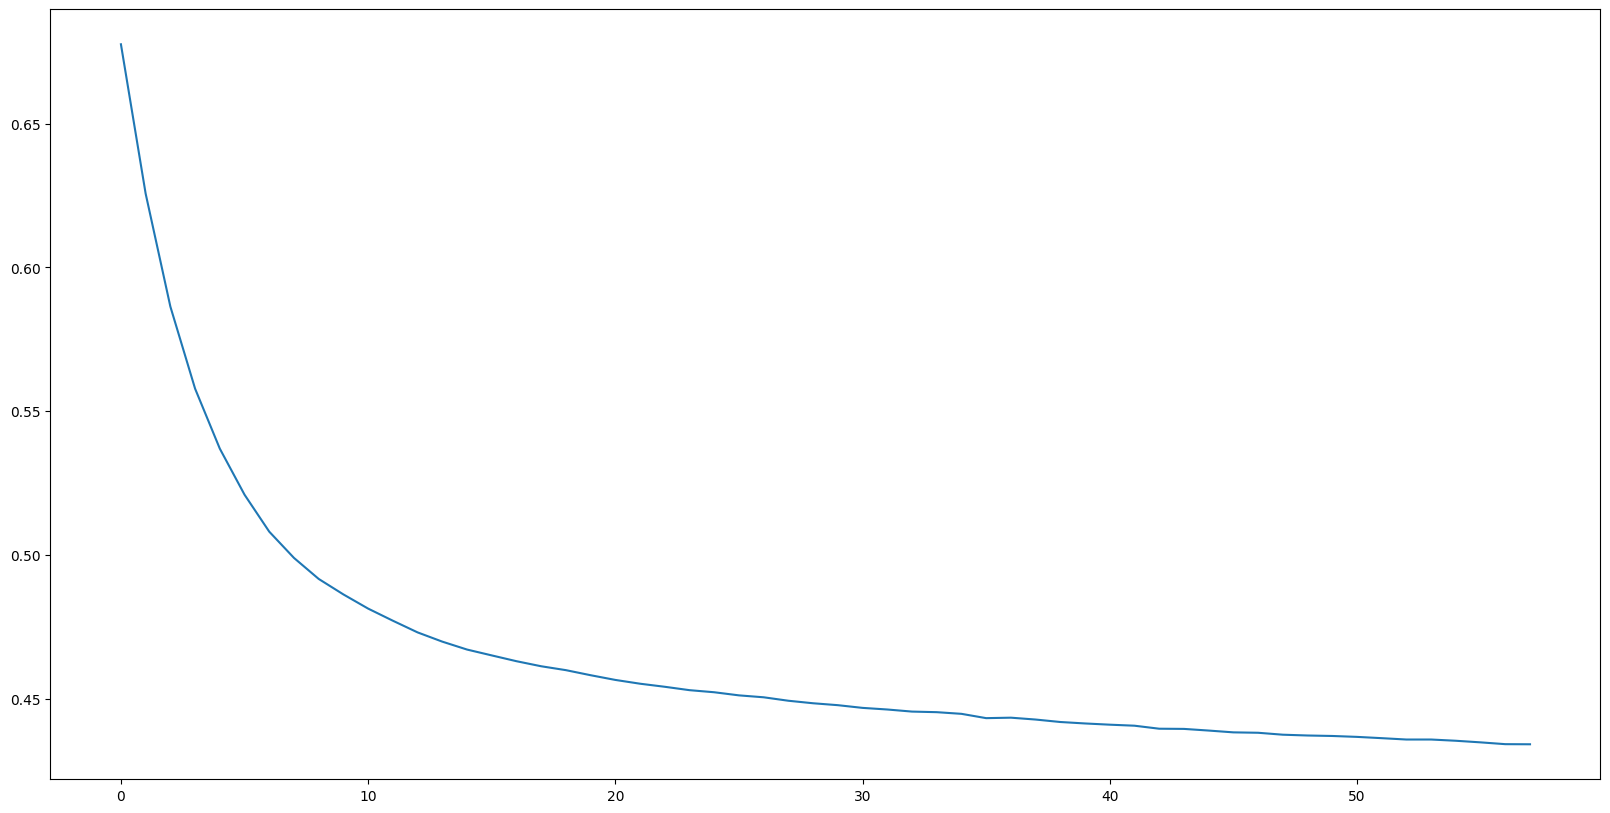

In [35]:
plt.plot(history.history['loss'])

In [36]:
def build_model(hp):

    model=Sequential()
    
    model.add(Dense(66,activation='relu',input_dim=6))

    for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
         model.add(Dense(66,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    return model
    
  

In [37]:
tuner=kt.RandomSearch(build_model,
                     objective='val_accuracy',
                     max_trials=5,
                     directory='mydir',
                     project_name='num_layers')

Reloading Tuner from mydir\num_layers\tuner0.json


In [38]:
tuner.search(X_train_scaled,y_train,epochs=5,validation_data=(X_test_scaled,y_test))

In [39]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 4}

In [40]:
model=tuner.get_best_models(num_models=1)[0]

C:\Users\91637\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [41]:
history=model.fit(X_train_scaled,y_train,epochs=500,initial_epoch=6,validation_data=(X_test_scaled,y_test),batch_size=32,callbacks=[early_stopping])

Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8023 - loss: 0.4402 - val_accuracy: 0.7727 - val_loss: 0.4952
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7863 - loss: 0.4345 - val_accuracy: 0.7532 - val_loss: 0.5144
Epoch 9/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7904 - loss: 0.4363 - val_accuracy: 0.7597 - val_loss: 0.5089
Epoch 10/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7834 - loss: 0.4443 - val_accuracy: 0.7532 - val_loss: 0.5380
Epoch 11/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8158 - loss: 0.3886 - val_accuracy: 0.7532 - val_loss: 0.5131
Epoch 12/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8206 - loss: 0.3890 - val_accuracy: 0.7662 - val_loss: 0.5249
Epoch 13/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7958 - loss: 0.4202 - val_accuracy: 0.7792 - val_loss: 0.5166
Epoch 14/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8176 - loss: 0.3924 - val_accuracy: 0.76

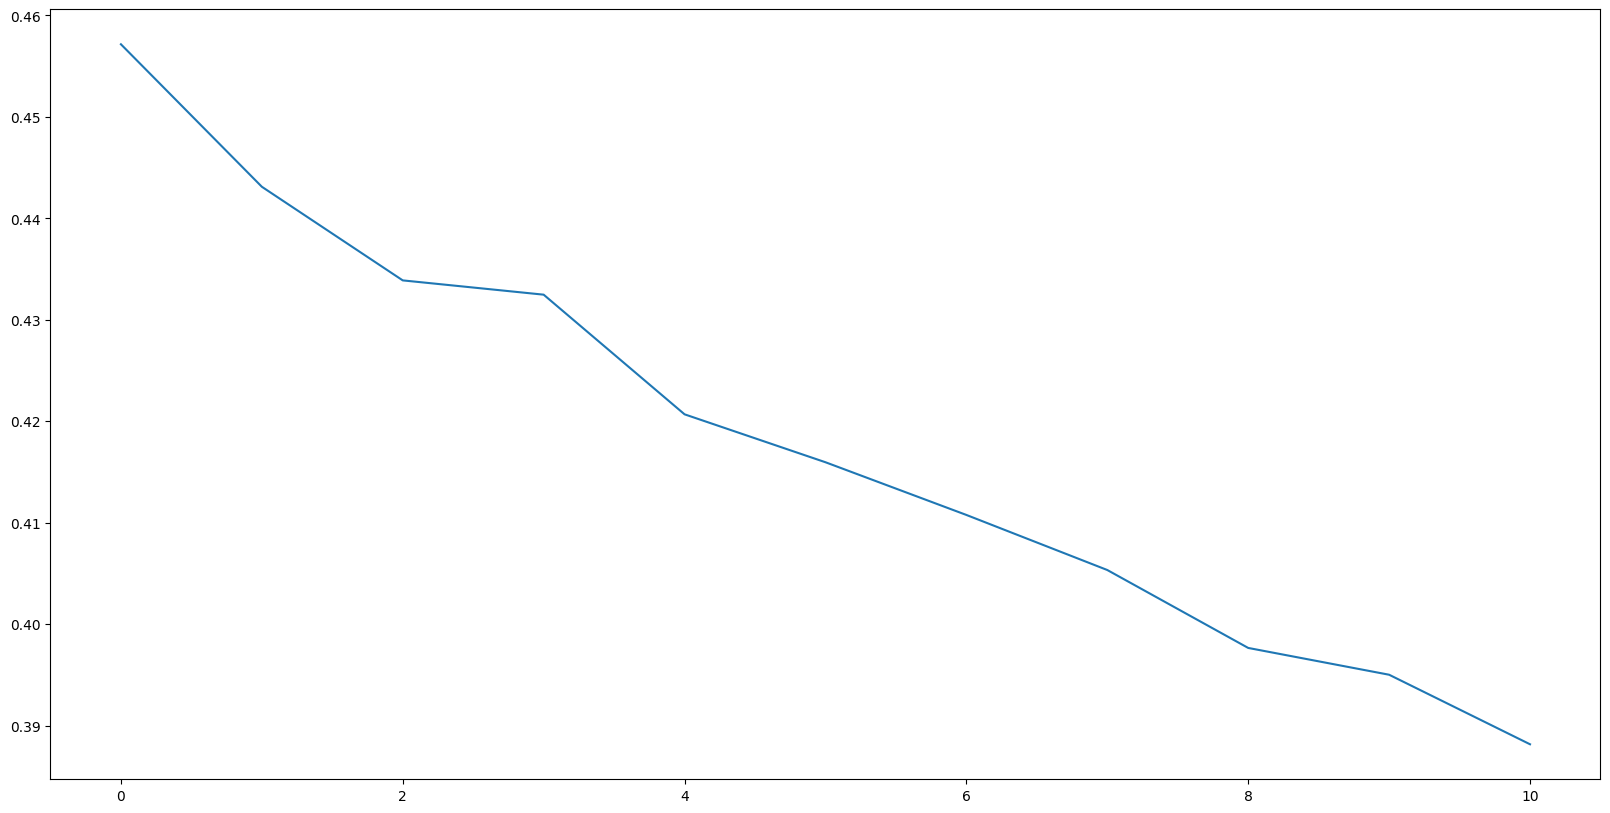

In [42]:
plt.plot(history.history['loss'])

In [43]:
def build_model(hp):

    model=Sequential()
    counter=0
    optm=hp.Choice('optimizer', values=['adam','sgd','rmsprop','adadelta','nadam'])
   
    for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
         if counter==0:
             model.add(
                 Dense(
                     hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
                     activation=hp.Choice('activation'+str(i),values=['relu','sigmoid','tanh']),
                     input_dim=6
                 )
                 )
             model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
         else: 
                 model.add(
                 Dense(
                     hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
                     activation=hp.Choice('activation'+str(i),values=['relu','sigmoid','tanh'])
                 )
                 )
                 model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
         counter+=1
                 
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer=optm,loss='binary_crossentropy',metrics=['accuracy'])
    return model
    

In [44]:
tuner=kt.RandomSearch(build_model,
                     objective='val_accuracy',
                     max_trials=5,
                     directory='mydir',
                     project_name='final')

Reloading Tuner from mydir\final\tuner0.json


In [45]:
tuner.search(X_train_scaled,y_train,epochs=5,validation_data=(X_test_scaled,y_test))

In [46]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'nadam',
 'num_layers': 5,
 'units0': 64,
 'activation0': 'tanh',
 'units1': 48,
 'activation1': 'tanh',
 'units2': 104,
 'activation2': 'tanh',
 'units3': 80,
 'activation3': 'tanh',
 'units4': 8,
 'activation4': 'relu',
 'units5': 40,
 'activation5': 'sigmoid',
 'units6': 112,
 'activation6': 'tanh',
 'units7': 8,
 'activation7': 'tanh',
 'units8': 112,
 'activation8': 'sigmoid'}

In [47]:
model=tuner.get_best_models(num_models=1)[0]

C:\Users\91637\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'nadam', because it has 2 variables whereas the saved optimizer has 27 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [48]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 48)                  │           3,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 48)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 104)                 │           5,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 104)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 80)                  │           8,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,721 (69.22 KB)

 Trainable params: 17,721 (69.22 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
history=model.fit(X_train_scaled,y_train,epochs=500,initial_epoch=6,validation_data=(X_test_scaled,y_test),batch_size=32,callbacks=[early_stopping])

Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7610 - loss: 0.4907 - val_accuracy: 0.7987 - val_loss: 0.4849
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7662 - loss: 0.4717 - val_accuracy: 0.7662 - val_loss: 0.4944
Epoch 9/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7762 - loss: 0.4479 - val_accuracy: 0.8052 - val_loss: 0.4840
Epoch 10/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7455 - loss: 0.4767 - val_accuracy: 0.7987 - val_loss: 0.4844
Epoch 11/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7675 - loss: 0.4647 - val_accuracy: 0.7922 - val_loss: 0.4882
Epoch 12/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7783 - loss: 0.4452 - val_accuracy: 0.7922 - val_loss: 0.4901
Epoch 13/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7651 - loss: 0.4431 - val_accuracy: 0.7792 - val_loss: 0.4970
Epoch 14/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7747 - loss: 0.4645 - val_accuracy: 0.78

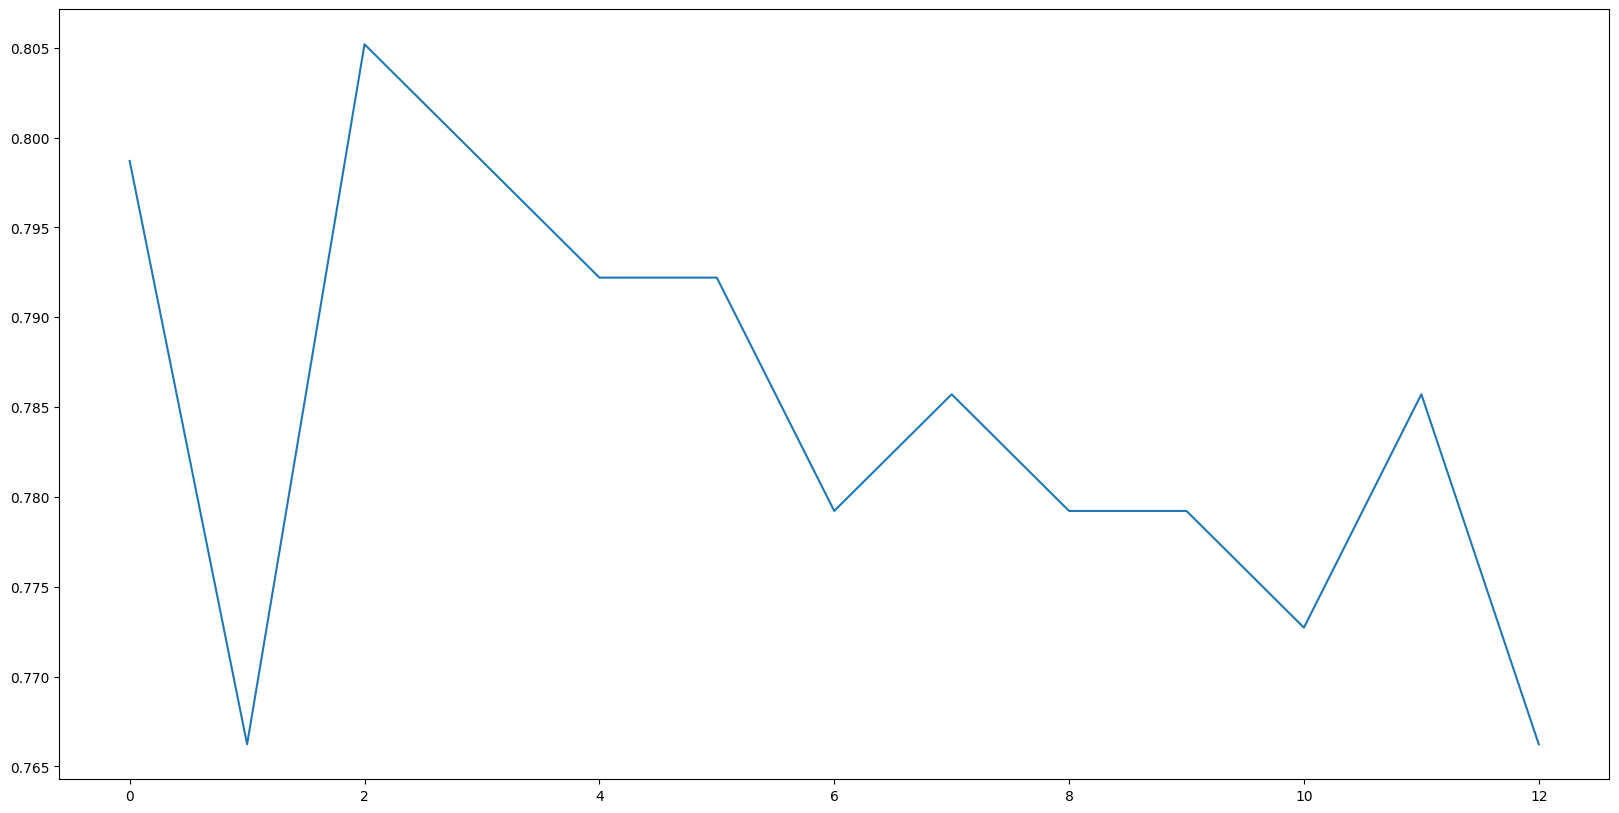

In [50]:
plt.plot(history.history['val_accuracy'])